<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/NeuralNetwork_RNN_ClaasificationRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks - Recurrent Neural Network

Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data.

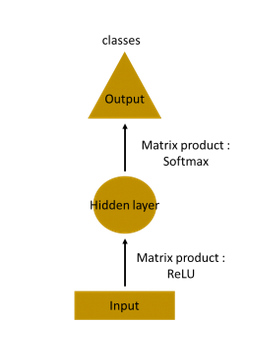

Activation Function :

    It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

The Activation Functions can be basically divided into 2 types-

1. Linear Activation Function 
2. Non-linear Activation Functions

Activation functions are a key part of neural network design.
The modern default activation function for hidden layers is the ReLU function.
The activation function for output layers depends on the type of prediction problem.

1. Activation Function for Hidden Layer :


    1. Rectified Linear Activation (ReLU)
    2. Logistic (Sigmoid)
    3. Hyperbolic Tangent (Tanh)

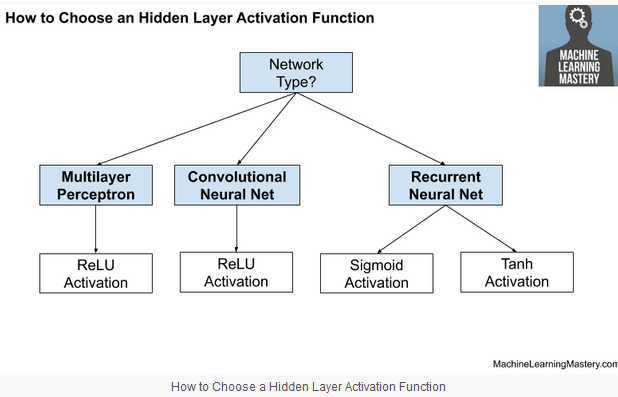

2. Activation Function for Output Layer :



    1. Linear
    2. Logistic (Sigmoid)
    3. Softmax

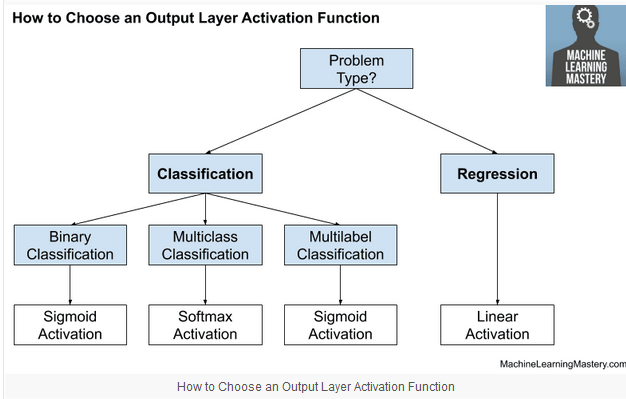

##Classification on diabetes data

In [6]:
#import all neecessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

In [4]:
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

###Build and fit Sequential model

In [7]:
#Select model
model=Sequential()

#Add layers sequentially (no of neurons,activation fun,no of features)
model.add(Dense(12,activation="relu",input_dim=8))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

#set model with loss fun, optimizer
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

#check summery of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [14]:
#fit model(epochs=no. of passes , batch =data divided in batches)
history=model.fit(x,y,epochs=50,batch_size=10,verbose=0)

In [15]:
#evaluate min loss and best accuracy stored in model
loss,acc=model.evaluate(x,y)

24/24 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7826


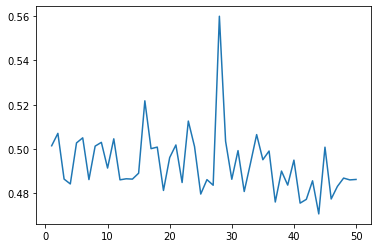

In [16]:
plt.plot(range(1,51),history.history["loss"])

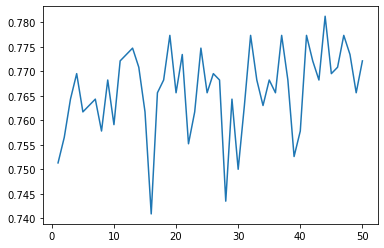

In [17]:
plt.plot(range(1,51),history.history["accuracy"])

In [19]:
ypred=model.predict(x)

##Regression on housing data

In [25]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [20]:
train=pd.read_csv("/content/california_housing_train.csv")
xtrain=train.drop(columns=["median_house_value"])
ytrain=train["median_house_value"]

test=pd.read_csv("/content/california_housing_test.csv")
xtest=test.drop(columns=["median_house_value"])
ytest=test["median_house_value"]

In [26]:
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_test=sc.fit_transform(xtest)

In [27]:
model=Sequential()
model.add(Dense(25,input_dim=8,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="linear"))
#model.compile(loss="mean_absolute_error",optimizer=SGD(momentum=0.6),metrics=["mse"])
model.compile(loss="mean_squared_logarithmic_error",optimizer=SGD(momentum=0.6),metrics=["mse"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                225       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(sc_xtrain,ytrain,epochs=100,batch_size=50)

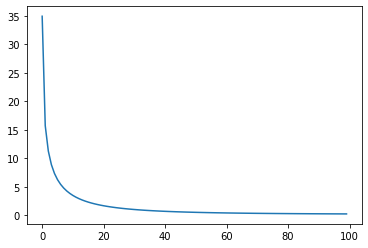

In [29]:
plt.plot(history.history["loss"])

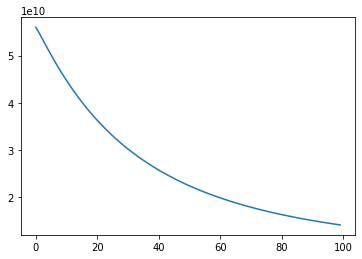

In [30]:
plt.plot(history.history["mse"])

In [31]:
ypred=model.predict(sc_test)

In [32]:
ypred.flatten()

array([166009.23, 147292.39, 171062.5 , ..., 110575.66, 150030.38,
       209584.42], dtype=float32)

In [34]:
result=pd.DataFrame({"Actual Value":ytest,"Predicted":ypred.flatten()})
result.head()

,Actual Value,Predicted
0,344700,166009.234375
1,176500,147292.390625
2,270500,171062.500000
3,330000,180774.250000
4,81700,120572.773438
